In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt


In [ ]:
vocab_size = 10000
maxlen = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
model = keras.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=32, input_length=maxlen),
    layers.GlobalAveragePooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_split=0.2, verbose=1)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.5346 - loss: 0.6896 - val_accuracy: 0.7178 - val_loss: 0.6638
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7108 - loss: 0.6447 - val_accuracy: 0.7926 - val_loss: 0.5595
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8115 - loss: 0.5236 - val_accuracy: 0.8310 - val_loss: 0.4361
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8525 - loss: 0.3969 - val_accuracy: 0.8540 - val_loss: 0.3664
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8712 - loss: 0.3321 - val_accuracy: 0.8624 - val_loss: 0.3330
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8873 - loss: 0.2913 - val_accuracy: 0.8712 - val_loss: 0.3202
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8992 - loss: 0.2648 - val_accuracy: 0.8694 - val_loss: 0.3166
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9020 - loss: 0.2477 - val_accuracy: 0.8784 - v

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8682 - loss: 0.3084
Test Accuracy: 0.8674


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Get predictions
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification metrics
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# AUC-ROC
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC: {auc:.3f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
              precision    recall  f1-score   support

    Negative       0.89      0.83      0.86     12500
    Positive       0.84      0.90      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000

AUC-ROC: 0.944


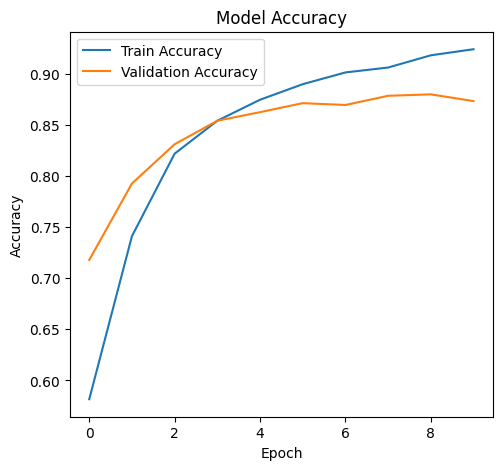

In [ ]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

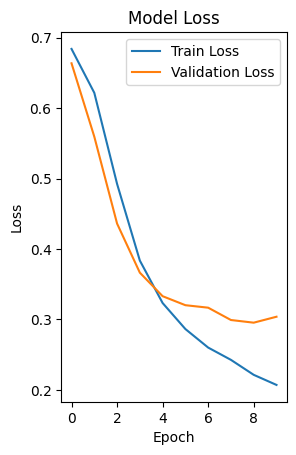

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
# Show sample predictions
y_pred_probs = model.predict(x_test[:10])
y_pred_classes = (y_pred_probs > 0.5).astype("int32")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [ ]:
for i in range(10):
    print(f"Review {i+1} - Predicted: {'Positive' if y_pred_classes[i][0] == 1 else 'Negative'}, Actual: {'Positive' if y_test[i] == 1 else 'Negative'} ")

Review 1 - Predicted: Negative, Actual: Negative 
Review 2 - Predicted: Positive, Actual: Positive 
Review 3 - Predicted: Positive, Actual: Positive 
Review 4 - Predicted: Positive, Actual: Negative 
Review 5 - Predicted: Positive, Actual: Positive 
Review 6 - Predicted: Positive, Actual: Positive 
Review 7 - Predicted: Positive, Actual: Positive 
Review 8 - Predicted: Negative, Actual: Negative 
Review 9 - Predicted: Positive, Actual: Negative 
Review 10 - Predicted: Positive, Actual: Positive 
